In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

In [3]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


In [23]:
sentence = "Hello. We are LLM students at the Chanwanich. Hello I am LLM LLM students at the Chanwanich."


In [24]:
def tokenizer(sentence):
    vocabulary = sentence.split()
    vocabulary.append("<EOS>")
    
    return vocabulary

In [25]:
def vocabulary_one_hot_encoder(tokens):
    results = []

    for i, _ in enumerate(tokens):
        one_hot_encode_vector = [0. for i in range(len(tokens))]
        
        for j in range(i + 1):
            one_hot_encode_vector[j] = 1. if j == i else 0.

        results.append(one_hot_encode_vector)
                    
    return results

In [26]:
def create_cbow_pairs(sequence, window_size):
    print(f"sequence: {sequence}")
    print(f"window_size: {window_size}")
    cbow_pairs = []

    for i in range(len(sequence)):
        print(f"i: {i}")
        context = []

        for j in range(-window_size, window_size + 1):
            if i + j >= 0 and i + j < len(sequence) and j != 0:
                context.append(sequence[i + j])
        
        # print(f"context: {context}")

        if context:
            context = np.sum(context, axis=0) / len(context)
            cbow_pairs.append(context)
            # print(f"cbow_pairs: {cbow_pairs}")
            
    return cbow_pairs

In [27]:
def word_decoder(anwser_list, vocabulary):
    idx = anwser_list.index(max(anwser_list))        
    return vocabulary[idx]

In [28]:
tokens = tokenizer(sentence)
print(tokens)
print(len(tokens))

['Hello.', 'We', 'are', 'LLM', 'students', 'at', 'the', 'Chanwanich.', 'Hello', 'I', 'am', 'LLM', 'LLM', 'students', 'at', 'the', 'Chanwanich.', '<EOS>']
18


In [29]:
training_x = vocabulary_one_hot_encoder(tokens)
print(training_x)
print(len(training_x))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [30]:
CONTEXT_SIZE = 2

training_y = create_cbow_pairs(training_x, CONTEXT_SIZE)
print(training_y)

sequence: [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0

In [31]:
class CBOWModeler(nn.Module):
    def __init__(self, volcabulary_size, embedding_dim):
        super(CBOWModeler, self).__init__()
        self.linear1 = nn.Linear(volcabulary_size, embedding_dim, bias=False)
        self.linear2 = nn.Linear(embedding_dim, volcabulary_size, bias=False)

    def forward(self, x):
        out = self.linear1(x)
        out = self.linear2(out)
        return F.softmax(out, dim=-1)
    
    def save_embedding_model(self):
        params = self.linear1.state_dict()
        print(params["weight"])
        print(params["weight"].shape)
        torch.save(params, "./embedding_model.pt")

In [32]:
EMBEDDING_DIM = 20

losses = []
model = CBOWModeler(len(tokens), EMBEDDING_DIM).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

print(model)

CBOWModeler(
  (linear1): Linear(in_features=18, out_features=20, bias=False)
  (linear2): Linear(in_features=20, out_features=18, bias=False)
)


In [33]:
print(training_x[0])
print(len(training_x[0]))
print(training_y[0])
print(len(training_y[0]))



[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
18
[0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
18


In [34]:
for epoch in range(1000):
    total_loss = 0
    
    for x, y in zip(training_x, training_y):
        x, y = torch.tensor(x).to(device), torch.tensor(y).to(device)

        model.zero_grad()

        y_hat = model(x)

        loss = loss_function(y, y_hat)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    losses.append(total_loss)

model.save_embedding_model()

tensor([[ 0.7928,  0.3316,  0.0749,  0.9376,  0.0941,  0.7221,  1.2779, -1.0350,
         -1.2808,  1.4943, -1.2356, -0.9502, -2.3186, -1.1182,  0.8035, -1.3617,
         -1.2926,  0.7379],
        [-0.9238, -0.9280, -0.9854, -0.8207, -0.4526,  0.8013,  1.5929,  0.9659,
          1.1998,  0.6742,  1.1444,  1.1421, -1.9636, -3.0929,  1.7600, -1.4613,
         -1.0936,  1.4953],
        [ 0.8190,  0.9487, -1.3181,  0.8586,  1.2519,  2.0236,  1.4445, -0.4791,
          0.5466,  0.9111, -1.1180, -0.0104,  0.8911, -0.8006, -0.7596,  0.6397,
         -0.6286, -0.7094],
        [ 0.9283,  1.0759, -0.5557,  1.1290,  0.7175, -1.3177, -1.1469, -0.7630,
          0.1433, -1.1553,  0.5487,  0.9839, -0.4804, -0.5886,  0.0833,  0.1819,
         -1.1773, -1.3613],
        [ 0.3560,  0.0476, -1.3179,  0.4190,  0.6010,  0.0557,  0.8149,  0.9118,
          0.5778,  1.1820,  0.4735, -0.7598, -2.3283, -1.3789, -1.0200, -0.8330,
         -0.9071, -0.8429],
        [-0.9671, -0.8096, -0.7720, -1.0111, -0.87

In [35]:
import matplotlib.pyplot as plt

In [36]:
def plot_losses(ax, t, losses):
    ax.plot(t, losses)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")

In [37]:
len(losses)

1000

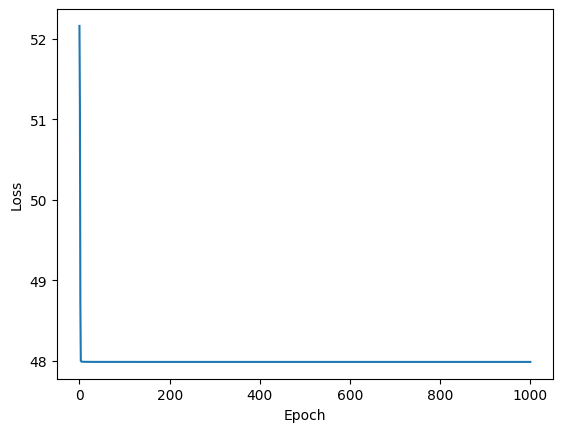

In [38]:
fig, ax = plt.subplots()
plot_losses(ax, np.linspace(0., 1000., len(losses)), losses)

In [39]:
for x, y in zip(training_x, training_y):
    # Get predicted vector
    pred = model(torch.tensor(x).to(device))

    # Get the argmax index
    argmax_idx = torch.argmax(pred, keepdim=True)

    # Create a one-hot encoded tensor
    anwser_vector = F.one_hot(argmax_idx, num_classes=pred.size(-1)).int()
    anwser_list = anwser_vector.tolist()

    print(x)
    print(anwser_list[0])
    
    question = word_decoder(x, tokens)
    answer = word_decoder(anwser_list[0], tokens)
    print(question, answer)

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Hello. are
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
We are
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
are LLM
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
LLM are
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
students are
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
at students
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,